# Лабораторна робота №8

Варіант:

In [1]:
N=(8+4)%5+1
N

3

In [1]:
import pandas as pd
import numpy as np

In [2]:
alna = pd.read_csv(r'NationalNames.csv') #alna - all names
alna

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


### Task 1

In [5]:
alna.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


### Task 2

In [6]:
alna.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


### Task 4

In [7]:
alna.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### Task 5

In [8]:
alna['Name'].nunique()

93889

### Task 6

In [10]:
alna.groupby(['Gender'])[['Name']].nunique()

,Name
Gender,
F,64911
M,39199


### Task 7

In [15]:
alna[(alna['Gender'] == 'M') & (alna['Year'] == 2010)].sort_values(by='Count', ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


### Task 8

In [17]:
def find_most_popular_name(data, year):
    year_data = data[data['Year'] == year]
    
    most_popular = year_data.loc[year_data['Count'].idxmax()]
    
    return f"The name is \"{most_popular['Name']}\" in {year}"

year = 1947
result = find_most_popular_name(alna, year)
result

'The name is "Linda" in 1947'

### Task 9

In [23]:
count_min_records = alna[alna['Count'] == alna['Count'].min()].shape[0]
count_min_records

254615

### Task 10

In [18]:
alna.groupby(['Year'])[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


### Task 11

In [27]:
unique_names_by_year = alna.groupby('Year')['Name'].nunique()

max_year = unique_names_by_year.idxmax()
max_unique_names = unique_names_by_year.max()

result_df = pd.DataFrame({'Year': [max_year], 'Unique Names': [max_unique_names]})
result_df

,Year,Unique Names
0,2008,32488


### Task 12

In [19]:
resname = find_most_popular_name(alna, 2008)
resname

'The name is "Jacob" in 2008'

### Task 18

In [31]:
gender_counts = alna.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_female = (gender_counts['F'] > gender_counts['M']).sum()
int(years_more_female)

54

### Task 19

In [50]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'total births per year')

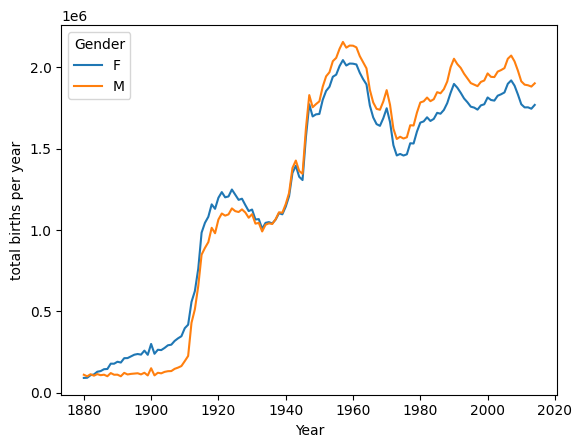

In [56]:
alna.groupby(['Gender','Year'])['Count'].sum().unstack().T.plot()
plt.ylabel('total births per year')

### Task 20

In [60]:
sum_neutral_names = (alna.groupby('Name')['Gender'].nunique() == 2).sum()
int(sum_neutral_names)

10221

### Task 21

In [4]:
barbaracount = alna[(alna['Gender'] == 'M') & (alna['Name'] == 'Barbara')].shape[0]
barbaracount

79

### Task 23

In [13]:
neutral_names = alna.groupby('Name')['Gender'].nunique() == 2
neutral_names_list = neutral_names[neutral_names].index

filtered_alna = alna[alna['Name'].isin(neutral_names_list)]

all_years = set(alna['Year'].unique())

names_by_year = filtered_alna.groupby('Name')['Year'].unique()
neutral_names_all_years = names_by_year[names_by_year.apply(lambda years: set(years) == all_years)]

neutral_names_df = pd.DataFrame({'Name': neutral_names_all_years.index})
neutral_names_df

,Name
0,Aaron
1,Abbie
2,Abel
3,Abigail
4,Abraham
...,...
818,Wilson
819,Winifred
820,Winnie
821,Wyatt


### Task 25

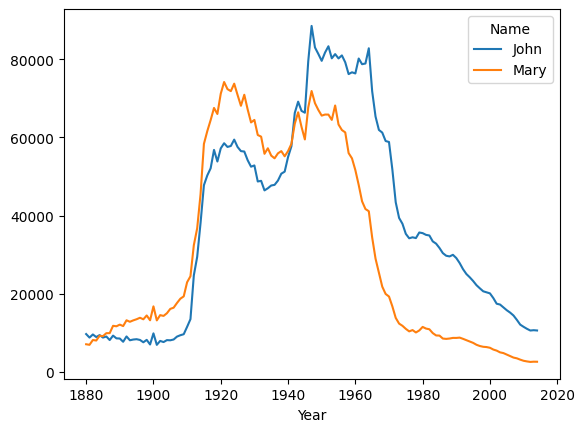

In [57]:
filtered_names = alna[alna['Name'].isin(['John', 'Mary'])]
pivot_data = filtered_names.groupby(['Year', 'Name'])['Count'].sum().unstack().plot()

### Task 27

In [17]:
names_by_year_count = alna.groupby(['Year', 'Name'])['Count'].sum()

most_popular_by_year = names_by_year_count.groupby('Year').idxmax()
most_popular_counts = names_by_year_count.groupby('Year').max()

res = pd.DataFrame({
    'Year': most_popular_by_year.index,
    'Name': [name[1] for name in most_popular_by_year.values],
    'Count': most_popular_counts.values
})

#names_by_year_count
#most_popular_by_year
#most_popular_counts
res

,Year,Name,Count
0,1880,John,9701
1,1881,John,8795
2,1882,John,9597
3,1883,John,8934
4,1884,John,9428
...,...,...,...
130,2010,Isabella,22913
131,2011,Sophia,21839
132,2012,Sophia,22285
133,2013,Sophia,21172
